<h2> Задача: </h2>

Решить уравнение Лапласа в прямоугольнике $\left[ 0 , 4\right] \times  \left[ 0 , 2\right]$

$
\begin{cases}
   \Delta \varphi (x, y)  = 0, \\
   \varphi (x, 0) = \varphi (0, y) = \varphi (4, y) = 0, \\
   \varphi (x, 2) = 10.
\end{cases}
$


Точное решение:

$
\displaystyle
\varphi\left(x, y\right) = \sum_{n = 1}^{\infty} \dfrac{20 \left(1 - (-1)^n \right)}{\pi n \left[ exp\left({-\dfrac{\pi n}{2}}\right) - exp\left({\dfrac{\pi n}{2}}\right)  \right]} \left[ exp\left({-\dfrac{\pi n}{4}} y \right) -  exp\left({\dfrac{\pi n}{4}} y \right)  \right] \sin{\left( \dfrac{\pi n}{4} x \right)}
$

In [202]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pandas as pd
import numpy as np
from numba import njit
import time

export_path = "./latex/illustr/domain_rectangle_dirichlet_only/"
# plots a finite element mesh
def plot_fem_mesh(nodes_x, nodes_y, elements, linewidth: float = 0.2):
    # print(nodes_x)
    it = 0
    for element in elements:
        x = [nodes_x[element[0]], nodes_x[element[1]], nodes_x[element[2]]]
        y = [nodes_y[element[0]], nodes_y[element[1]], nodes_y[element[2]]]
        # print(x , y)
        plt.fill(x, y, edgecolor='black', linewidth = linewidth, fill=False)
        it += 1

@njit()
def exact_solution(x, y, row_num_el: int = 350):
    res = 0
    for n in range(1, row_num_el + 1):
        res += 20 * (1 - (-1) ** n) / (np.pi * n) / (np.exp(- np.pi * n / 2 ) - np.exp( np.pi * n / 2 )) * (np.exp(- np.pi * n / 4 * y ) - np.exp( np.pi * n / 4 * y)) * np.sin(np.pi * n / 4 * x)
    if np.fabs(res) < 1e-15:
        return 0.
    return res

def print_mean_error(x, y ,z):
    error_in_node = [];
    for i in range(len(z)):
        error_in_node.append( np.fabs( z[i] - exact_solution(x[i], y[i]) ))
    print("Mean error: ", round(np.mean(error_in_node), 8))
    print("Max error: ", round(np.max(error_in_node), 8))

    # for i in range(len(error_in_node)):
    #     if error_in_node[i] > 0.2:
    #         print( x[i], y[i], error_in_node[i])



def print_mear_rel_error(x, y ,z):
    error_in_node = [];
    for i in range(len(z)):
        z_exact = exact_solution(x[i], y[i])
        if np.fabs(z_exact) > 1e-9:
            error_in_node.append( np.divide(np.fabs( z[i] - z_exact ) , z_exact) )
    print("Mean rel error: ", round(np.mean(error_in_node), 8))



<h1> True sol

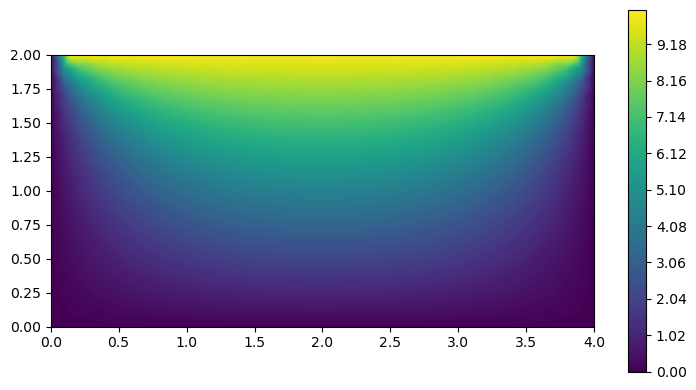

In [203]:
df_x_y = pd.read_csv("./domains/domain_2/mesh001/mesh_nodes.csv")
df_z_exact = pd.read_csv("./output/domain_2_extra/mesh001/Test_domain_2_rectangle_dirichlet_only_001_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh001/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;
for i in range(len(df_z_exact["sol"].values)):
    df_z_exact["sol"].values[i] = exact_solution(df_x_y["x"].values[i], df_x_y["y"].values[i])


plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z_exact["sol"].values, levels = 200)

#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)

plt.axis("image")
plt.colorbar()
plt.savefig(export_path + "rect_dirichlet_only_exact_sol.png", dpi = 500, transparent=True)
plt.show()


<h2> Численное решение </h2>

<h1> Rectangle domain (normal cell 0.05)

0.70565149 0.71428571 1.92249706 1.9122131 0.01028396 0.00534927
3.79021072 1.79689642 5.04479917 4.4419888 0.60281037 0.11949145
2.0 0.24565203 1.02955191 1.0270245 0.00252741 0.00245486
2.30769231 0.17049592 0.69845102 0.69702505 0.00142597 0.00204161
3.0592947 1.80003042 8.41313988 8.3748365 0.03830338 0.0045528
Mean rel error:  0.00857928
Mean error:  0.02044656
Max error:  0.60281037


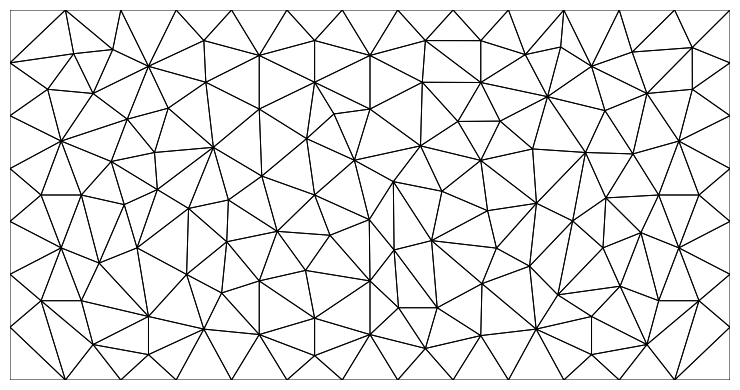

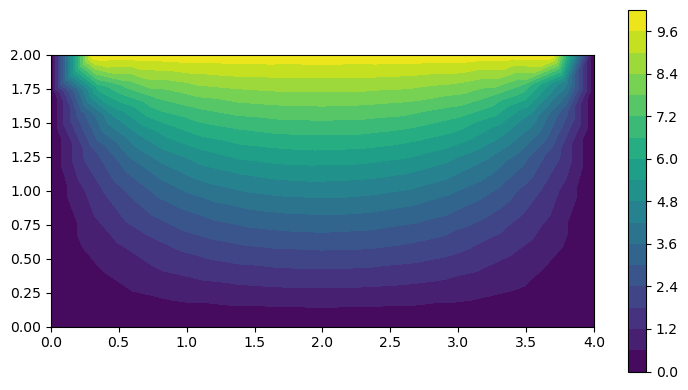

In [204]:
domain_name = "rect_dirichlet_only_005"

df_x_y = pd.read_csv("./domains/domain_2/mesh005/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_2_extra/mesh005/Test_domain_2_rectangle_dirichlet_only_005_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh005/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;

def pr_er(k):
    z_exact = exact_solution(df_x_y["x"].values[k], df_x_y["y"].values[k])
    print( round(df_x_y["x"].values[k], 8),  round(df_x_y["y"].values[k], 8), round(z_exact, 8), round(df_z["sol"].values[k], 8), round(np.fabs(z_exact - df_z["sol"].values[k]) , 8), round(np.fabs(z_exact - df_z["sol"].values[k]) / z_exact, 8))


k = 40
pr_er(k)

k = 60
pr_er(k)

k = 80
pr_er(k)

k = 100
pr_er(k)

k = 140
pr_er(k)


print_mear_rel_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)
print_mean_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)

plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)
plt.xlim(0, 4)
plt.ylim(0, 2)
plt.axis('off')
plt.savefig(export_path + domain_name + "_net.pdf", transparent=True)
plt.show()
plt.close()



plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 17)


plt.axis("image")
plt.colorbar()
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=True)
plt.show()


Mean rel error:  0.0015214
Mean error:  0.0043891
Max error:  0.53811642


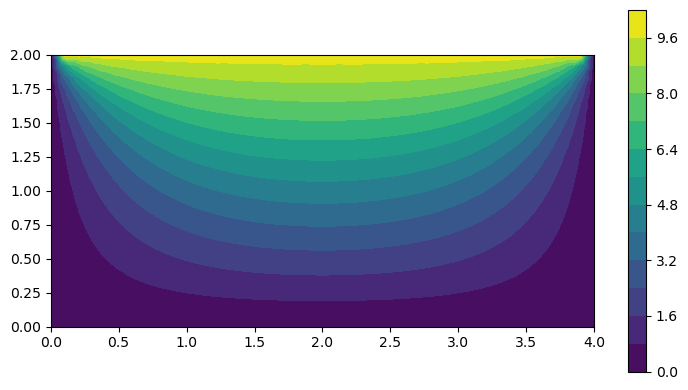

In [205]:
domain_name = "rect_dirichlet_only_005_test"

df_x_y = pd.read_csv("./domains/domain_2/mesh005_test/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_2_extra/mesh005_test/Test_domain_2_rectangle_dirichlet_only_005_test_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh005_test/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;

# def pr_er(k):
#     z_exact = exact_solution(df_x_y["x"].values[k], df_x_y["y"].values[k])
#     print( round(df_x_y["x"].values[k], 8),  round(df_x_y["y"].values[k], 8), round(z_exact, 8), round(df_z["sol"].values[k], 8), round(np.fabs(z_exact - df_z["sol"].values[k]) , 8), round(np.fabs(z_exact - df_z["sol"].values[k]) / z_exact, 8))


# k = 40
# pr_er(k)

# k = 60
# pr_er(k)

# k = 80
# pr_er(k)

# k = 100
# pr_er(k)

# k = 140
# pr_er(k)


print_mear_rel_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)
print_mean_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)

plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

# plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)
# plt.xlim(0, 4)
# plt.ylim(0, 2)
# plt.axis('off')
# plt.savefig(export_path + domain_name + "_net.pdf", transparent=True)
# plt.show()
# plt.close()



plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 13)
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)


plt.axis("image")
plt.colorbar()
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=True)
plt.show()


<h1> Rectangle domain (small cell 0.01)

0.23366363 0.86666667 0.92024967 0.91207042 0.00817925 0.00888808
3.79522734 0.46074876 0.37867336 0.38007247 0.00139911 0.00369476
0.663541 0.88058667 2.37307293 2.3649529 0.00812003 0.00342174
0.68030636 0.42008395 1.03698103 1.0334286 0.00355243 0.00342574
Mean rel error:  0.00301047
Mean error:  0.0081887
Max error:  0.72449988


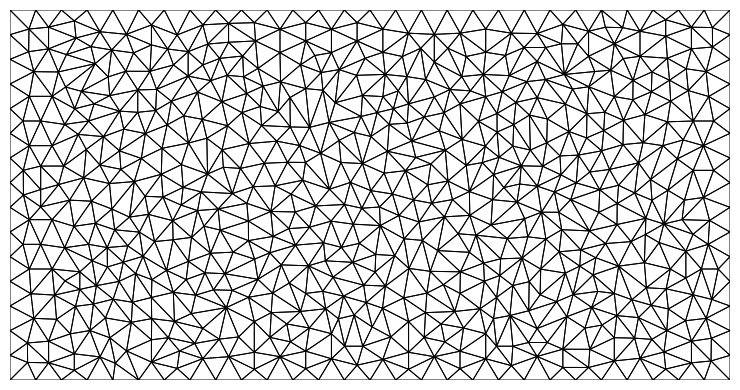

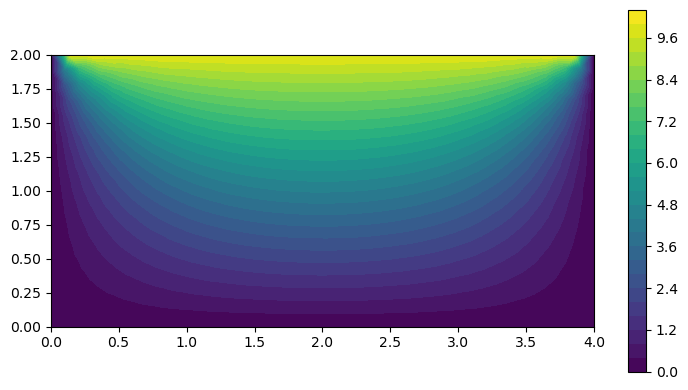

In [206]:
domain_name = "rect_dirichlet_only_001"

df_x_y = pd.read_csv("./domains/domain_2/mesh001/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_2_extra/mesh001/Test_domain_2_rectangle_dirichlet_only_001_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh001/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;

def pr_er(k):
    z_exact = exact_solution(df_x_y["x"].values[k], df_x_y["y"].values[k])
    print( round(df_x_y["x"].values[k], 8),  round(df_x_y["y"].values[k], 8), round(z_exact, 8), round(df_z["sol"].values[k], 8), round(np.fabs(z_exact - df_z["sol"].values[k]) , 8), round(np.fabs(z_exact - df_z["sol"].values[k]) / z_exact, 8))


k = 100
pr_er(k)

k = 200
pr_er(k)

k = 300
pr_er(k)

k = 400
pr_er(k)

print_mear_rel_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)
print_mean_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)


plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)
plt.xlim(0, 4)
plt.ylim(0, 2)
plt.axis('off')
plt.savefig(export_path + domain_name + "_net.pdf", transparent=True)
plt.show()
plt.close()

plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 25)

#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)

plt.axis("image")
plt.colorbar()
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=True)
plt.show()

1.81928956 1.90187664 9.41722314 9.4183666 0.00114346 0.00012142
3.77952568 0.21185966 0.18053213 0.18034526 0.00018687 0.00103509
2.21328848 1.65646601 7.97069116 7.9702937 0.00039746 4.987e-05
1.59853336 0.85423037 3.6372332 3.6369696 0.0002636 7.247e-05
Mean rel error:  0.00086673
Mean error:  0.00295423
Max error:  1.50868107


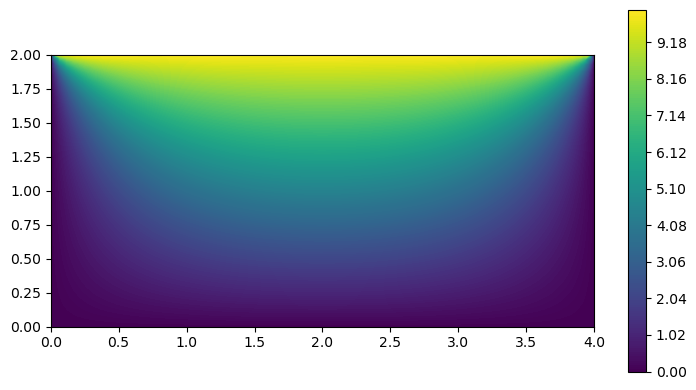

In [207]:
domain_name = "rect_dirichlet_only_0001"

df_x_y = pd.read_csv("./domains/domain_2/mesh0001/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_2_extra/mesh0001/Test_domain_2_rectangle_dirichlet_only_0001_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh0001/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;


def pr_er(k):
    z_exact = exact_solution(df_x_y["x"].values[k], df_x_y["y"].values[k])
    print( round(df_x_y["x"].values[k], 8),  round(df_x_y["y"].values[k], 8), round(z_exact, 8), round(df_z["sol"].values[k], 8), round(np.fabs(z_exact - df_z["sol"].values[k]) , 8), round(np.fabs(z_exact - df_z["sol"].values[k]) / z_exact, 8))

k = 1000
pr_er(k)

k = 2000
pr_er(k)

k = 3000
pr_er(k)

k = 4000
pr_er(k)

print_mear_rel_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)
print_mean_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)

plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

# plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)
# plt.xlim(0, 4)
# plt.ylim(0, 2)
# plt.axis('off')
# plt.savefig(export_path + domain_name + "_net.pdf", transparent=True)

plt.show()
plt.close()


plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 200)

#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)

plt.axis("image")
plt.colorbar()
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=True)
#plt.Axes.set_aspect('equal', adjustable='box', anchor='C')
plt.show()

0.06596113 1.83781209 2.44440116 2.4208938 0.02350736 0.00961682
0.63920709 0.17242545 0.39424798 0.39397865 0.00026933 0.00068315
1.85704969 0.16716499 0.69594442 0.69589616 4.826e-05 6.935e-05
3.89251655 1.57971404 1.53190778 1.5306877 0.00122008 0.00079645
Mean rel error:  0.00054621
Mean error:  0.00173986
Max error:  1.41960958


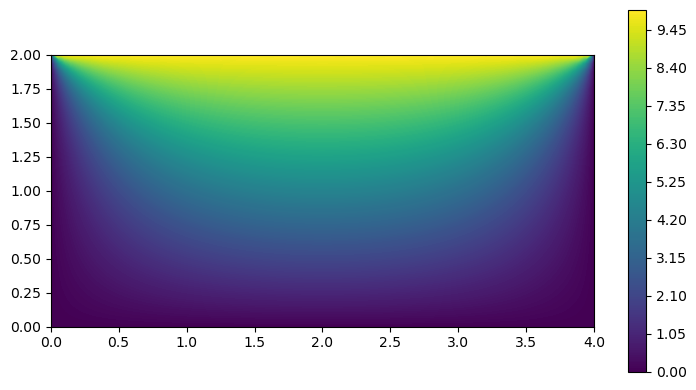

In [208]:
domain_name = "rect_dirichlet_only_00008"

df_x_y = pd.read_csv("./domains/domain_2/mesh00008/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_2_extra/mesh00008/Test_domain_2_rectangle_dirichlet_only_00008_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh00008/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;

for i in range(len(df_z["sol"].values)):
    # if np.fabs(df_z["sol"].values[i] - 10.) < 1e-3:
    #     df_z["sol"].values[i] = 10.
    if df_z["sol"].values[i] > 10.:
        df_z["sol"].values[i] = 10.

def pr_er(k):
    z_exact = exact_solution(df_x_y["x"].values[k], df_x_y["y"].values[k])
    print( round(df_x_y["x"].values[k], 8),  round(df_x_y["y"].values[k], 8), round(z_exact, 8), round(df_z["sol"].values[k], 8), round(np.fabs(z_exact - df_z["sol"].values[k]) , 8), round(np.fabs(z_exact - df_z["sol"].values[k]) / z_exact, 8))

k = 1000
pr_er(k)

k = 2000
pr_er(k)

k = 3000
pr_er(k)

k = 4000
pr_er(k)

print_mear_rel_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)
print_mean_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)

plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

# plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)
# plt.xlim(0, 4)
# plt.ylim(0, 2)
# plt.axis('off')
# plt.savefig(export_path + domain_name + "_net.pdf", transparent=True)

plt.show()
plt.close()


plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 200)

#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)

plt.axis("image")
plt.colorbar()
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=True)
#plt.Axes.set_aspect('equal', adjustable='box', anchor='C')
plt.show()

2.48 0.38 1.52397364 1.5236218 0.00035184 0.00023087
0.88 0.78 2.49407401 2.4938919 0.00018211 7.302e-05
3.36 1.16 3.40589695 3.4056936 0.00020335 5.97e-05
1.76 1.56 7.40907999 7.4081562 0.00092379 0.00012468
Mean rel error:  0.00046586
Mean error:  0.00186589
Max error:  0.13483266


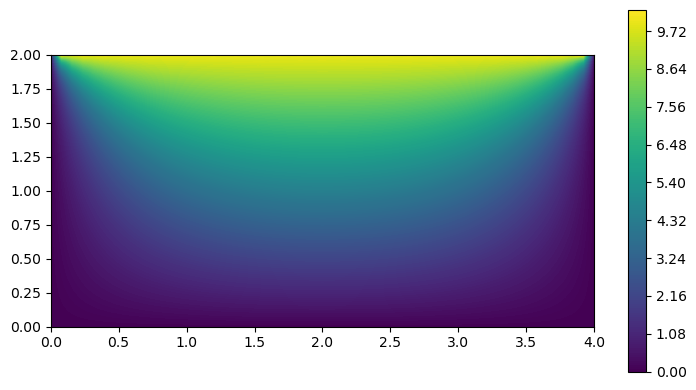

In [209]:
domain_name = "rect_dirichlet_only_00008_s"

df_x_y = pd.read_csv("./domains/domain_2/mesh00008_s/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_2_extra/mesh00008_s/Test_domain_2_rectangle_dirichlet_only_00008_s_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh00008_s/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;

def pr_er(k):
    z_exact = exact_solution(df_x_y["x"].values[k], df_x_y["y"].values[k])
    print( round(df_x_y["x"].values[k], 8),  round(df_x_y["y"].values[k], 8), round(z_exact, 8), round(df_z["sol"].values[k], 8), round(np.fabs(z_exact - df_z["sol"].values[k]) , 8), round(np.fabs(z_exact - df_z["sol"].values[k]) / z_exact, 8))

k = 1000
pr_er(k)

k = 2000
pr_er(k)

k = 3000
pr_er(k)

k = 4000
pr_er(k)

print_mear_rel_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)
print_mean_error(df_x_y["x"].values, df_x_y["y"].values, df_z["sol"].values)

plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

# plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)
# plt.xlim(0, 4)
# plt.ylim(0, 2)
# plt.axis('off')
# plt.savefig(export_path + domain_name + "_net.pdf", transparent=True)

plt.show()
plt.close()


plt.rcParams["figure.figsize"] = [7.5, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 200)

#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)

plt.axis("image")
plt.colorbar()
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=True)
#plt.Axes.set_aspect('equal', adjustable='box', anchor='C')
plt.show()

In [210]:
exact_solution(0.0001, 2., 450)

0.22498438663961115